<h1 align="center"><span style='font-family:sans-serif'>Student University Admission Prediction</h1>

### About The Dataset

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

1. Serial No. - The ID of each invidual student.
2. GRE Score - Graduate Record Examination score out of 340 
3. TOEFL Score - Test of English as a Foreign Language score out of 120 
4. University Rating - out of 5 
5. SOP - Statement of Purpose - out of 5
6. LOR Letter of Recommendation , out of 5 
7. CGPA -  Cumulative Grade Point Average, Undergraduate GPA, out of 10 
8. Research - Experience,  either 0 or 1 
9. Chance of Admit - ranging from 0.0 to 1.0 

source : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

## Overview
The goal of this project is to create a regression model that can predict a person's likelihood of getting accepted into a university. We will test three alternative models to see which one best fits the dataset provided, then compare the models to determine which one predicts with the lowest error and highest coefficient of determination.

## Problem Statement 

One of the struggles young people face is being accepted into a university. Understanding your odds of admission given the conditions set out by the university is important.
The dataset that is available will be used in this research to estimate the likelihood that a student will be admitted to a university based on their academic record.

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
# Load submissions file
admissions = pd.read_csv('adm_data.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Make a copy
df = admissions.copy()
# Look at the size
df.shape

(400, 9)

### Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.duplicated().sum()

0

In [6]:
# Renaming the columns
df.columns = ['serial_num', 'gre_score', 'toefl_score', 'university_rating',
              'sop', 'lor', 'cgpa_score', 'research_history', 
             'admission']

The dataset is clean and consistent.

### Exploratory Data Analysis

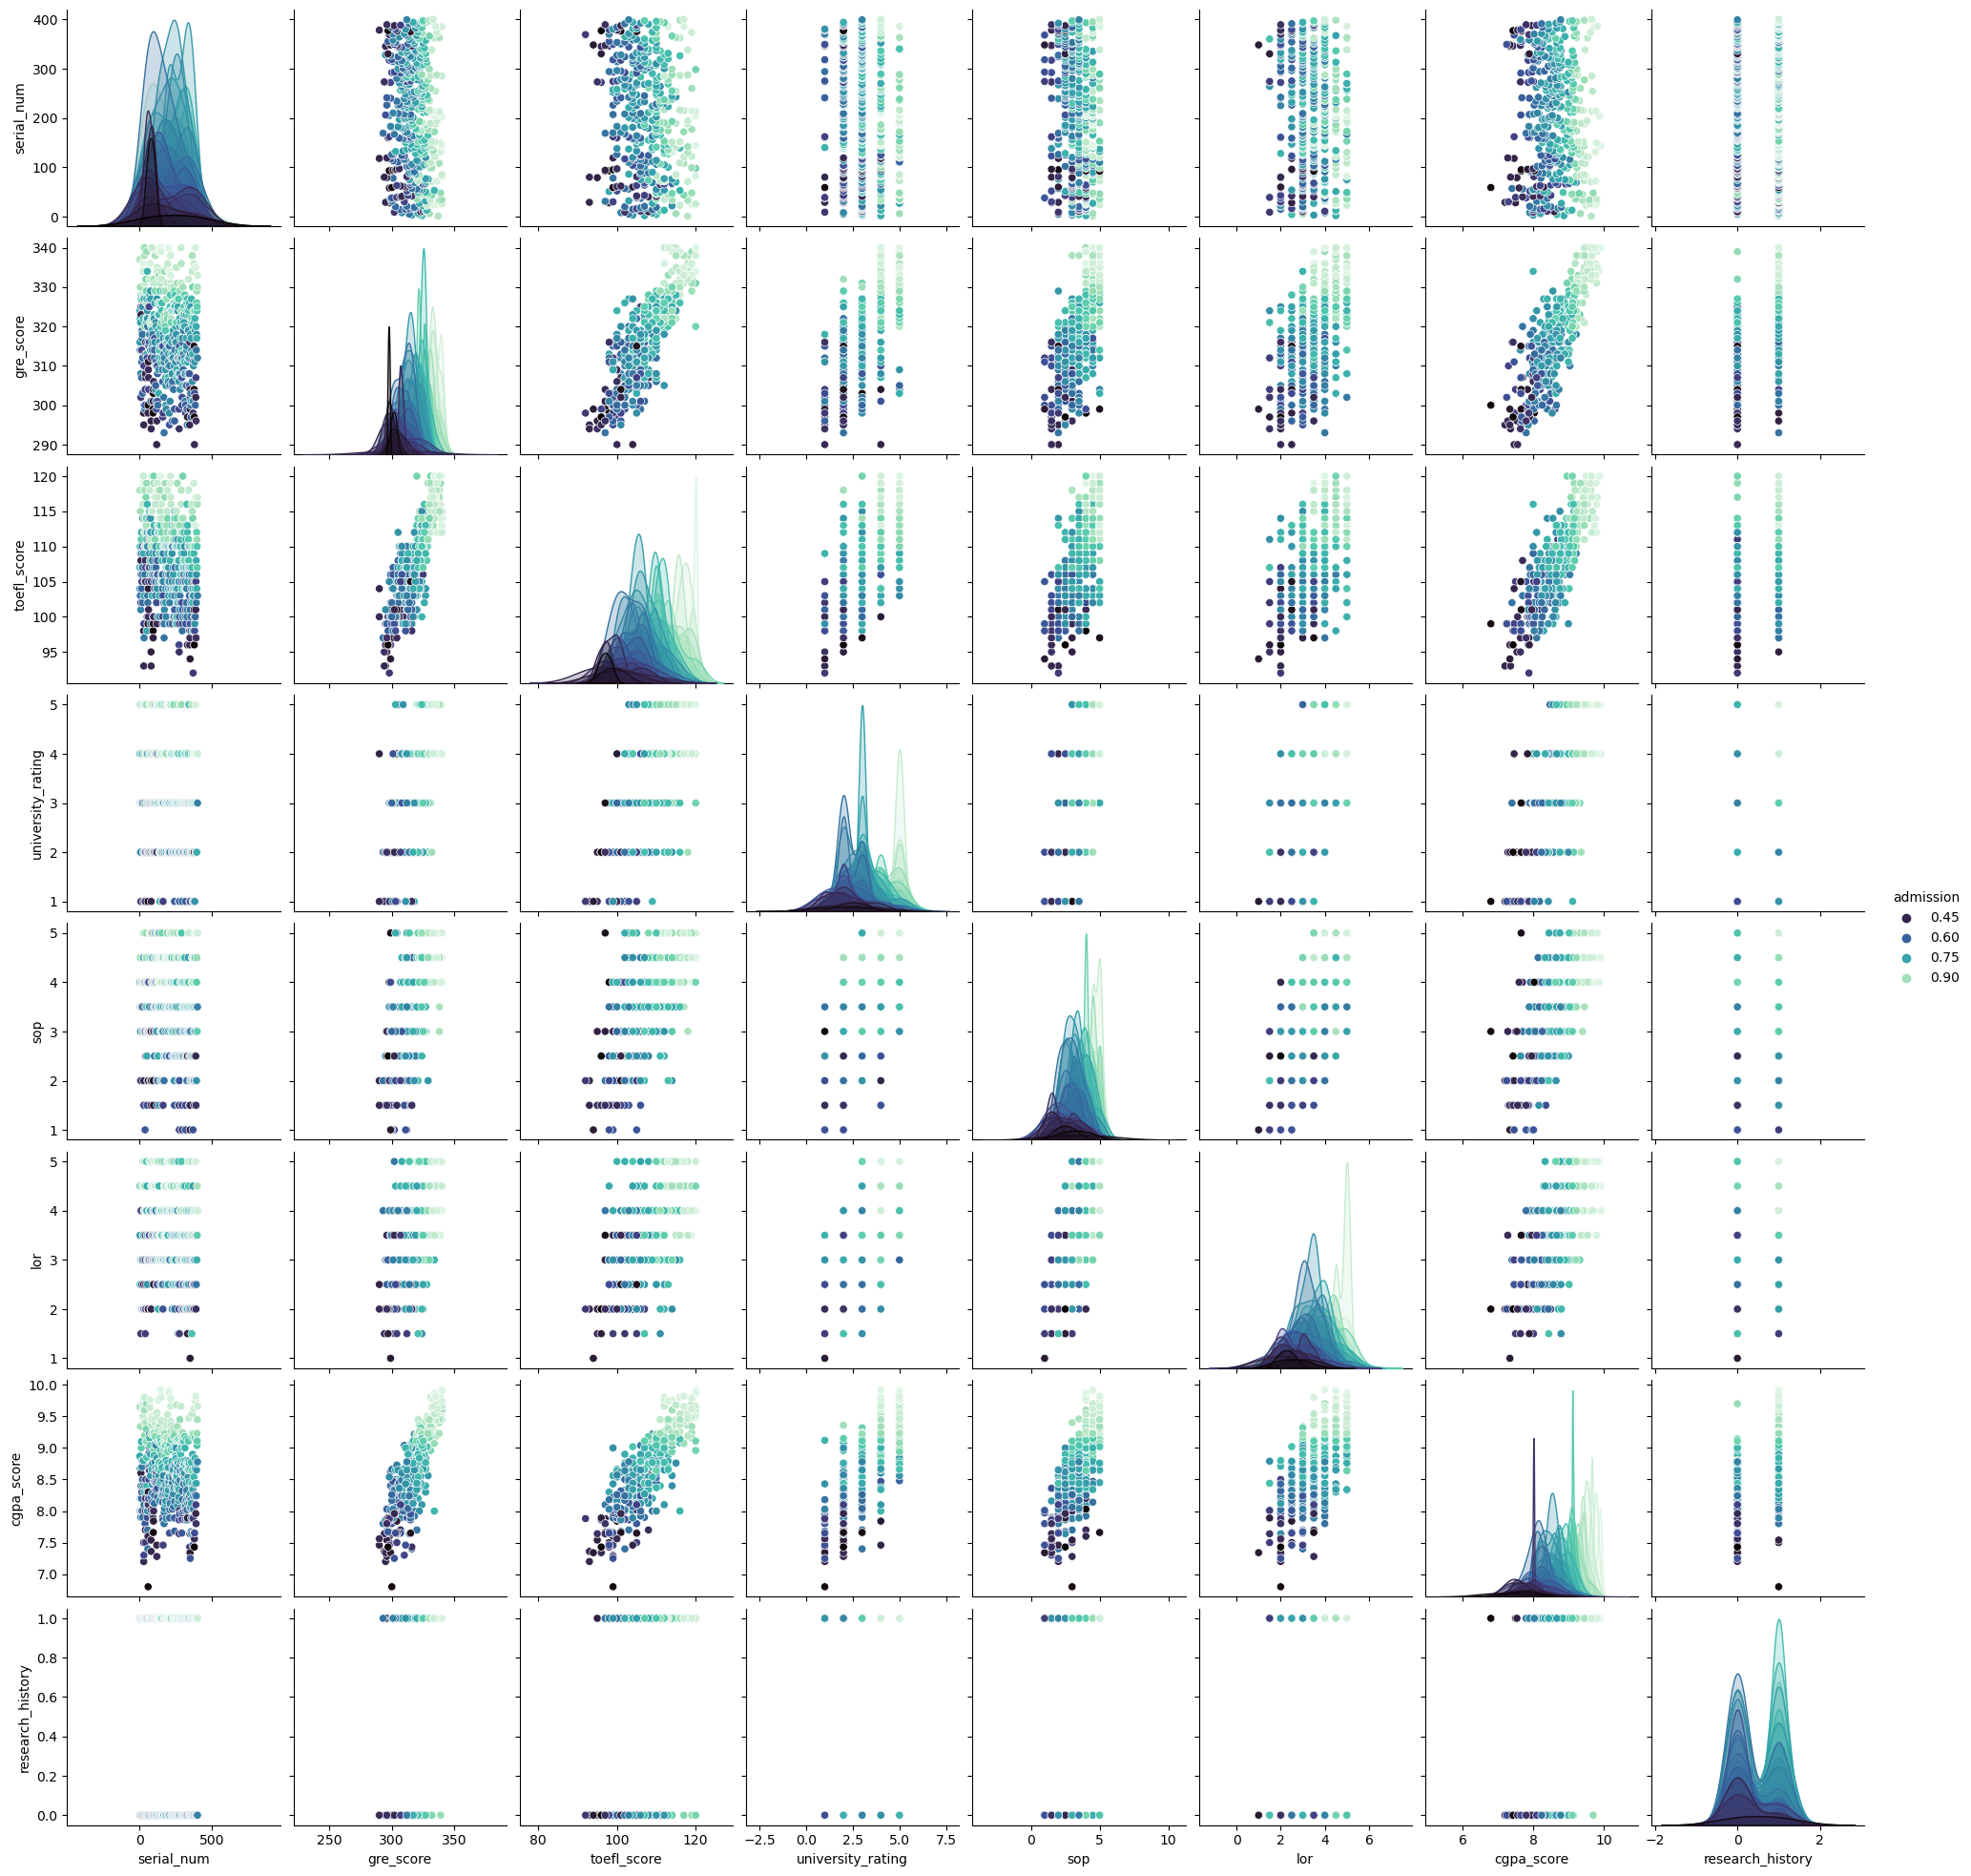

In [7]:
# feature relations
sns.pairplot(df, hue='admission', palette='mako');

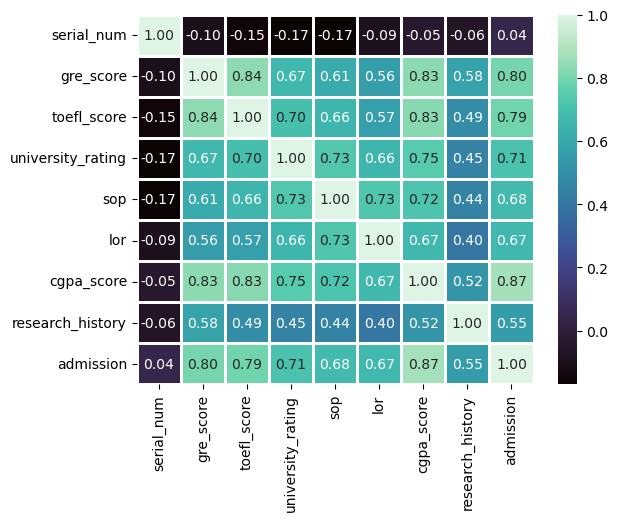

In [8]:
# heatmap to check for multicollinearity
sns.heatmap(df.corr(), annot=True, cmap='mako', linewidths=0.8, fmt='.2f');

All the features except `serial_num` have a medium to strong positive correlation with the target column, `admission`. 

In [9]:
df['serial_num'].value_counts().sum()

400

The `Serial No.` is unique for each student and negligible relation with other features and the target, we will discard it.

In [10]:
# Drop 'serial_num'
df.drop(['serial_num'], axis=1, inplace=True) 

Since `cgpa_score` had the highest correlation value at `0.87`, we will explore it further.

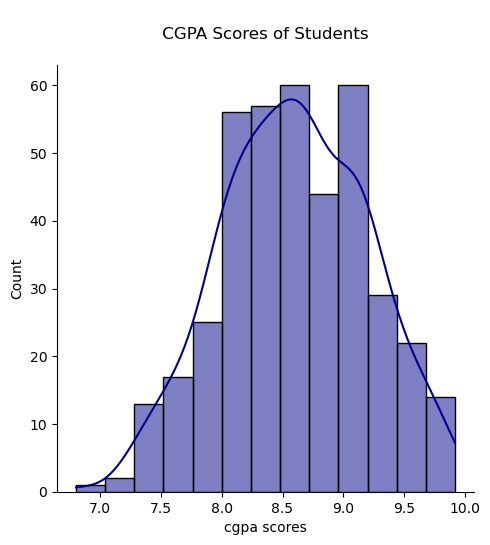

In [11]:
# Density Distribution of cgpa scores 
ax=sns.displot(df.cgpa_score, kde=True, color='darkblue')
ax.set(xlabel='cgpa scores',
      #ylabel='% Distribution',
      title='\n CGPA Scores of Students \n');

The data is somewhat normally distributed, as the mean and median are almost the same,
however the mode is different, contributing to a slightly right skew without a tail.

In [12]:
df.cgpa_score.median(), df.cgpa_score.mean(), df.cgpa_score.mode()  

(8.61,
 8.598924999999998,
 0    8.0
 Name: cgpa_score, dtype: float64)

The mean, median and mode are not the same but are close to each other, 
contributing to shape of the graph being almost normally distributed,
 however looking at the mean and stardard deviation we see that data is not so spread out because it off by ~m0.6,
 as 75 % of the students got ~ 9 while on average the score is 8.6
 the min and max values are almost not far off from the scoring ranging.
 All of this make the graph to have a slight right skew and no real outliers.

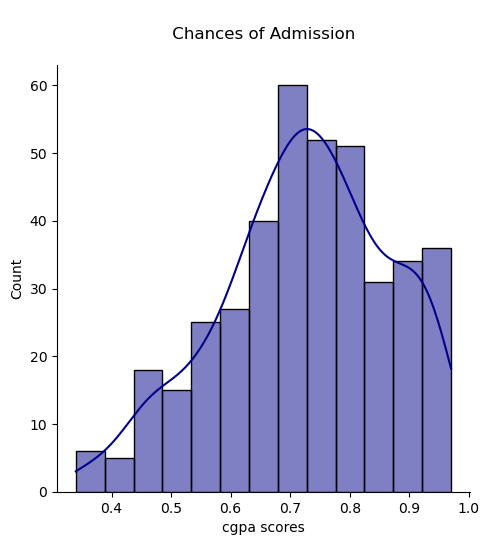

In [13]:
# Density Distribution of 'admission' 
ax=sns.displot(df.admission, kde=True, color='darkblue')
ax.set(xlabel='cgpa scores',
      #ylabel='% Distribution',
      title='\n Chances of Admission \n');

In [14]:
df.admission.median(), df.admission.mean(), df.admission.mode() 

(0.73,
 0.7243499999999996,
 0    0.64
 Name: admission, dtype: float64)

In [15]:
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor',
       'cgpa_score', 'research_history', 'admission'],
      dtype='object')

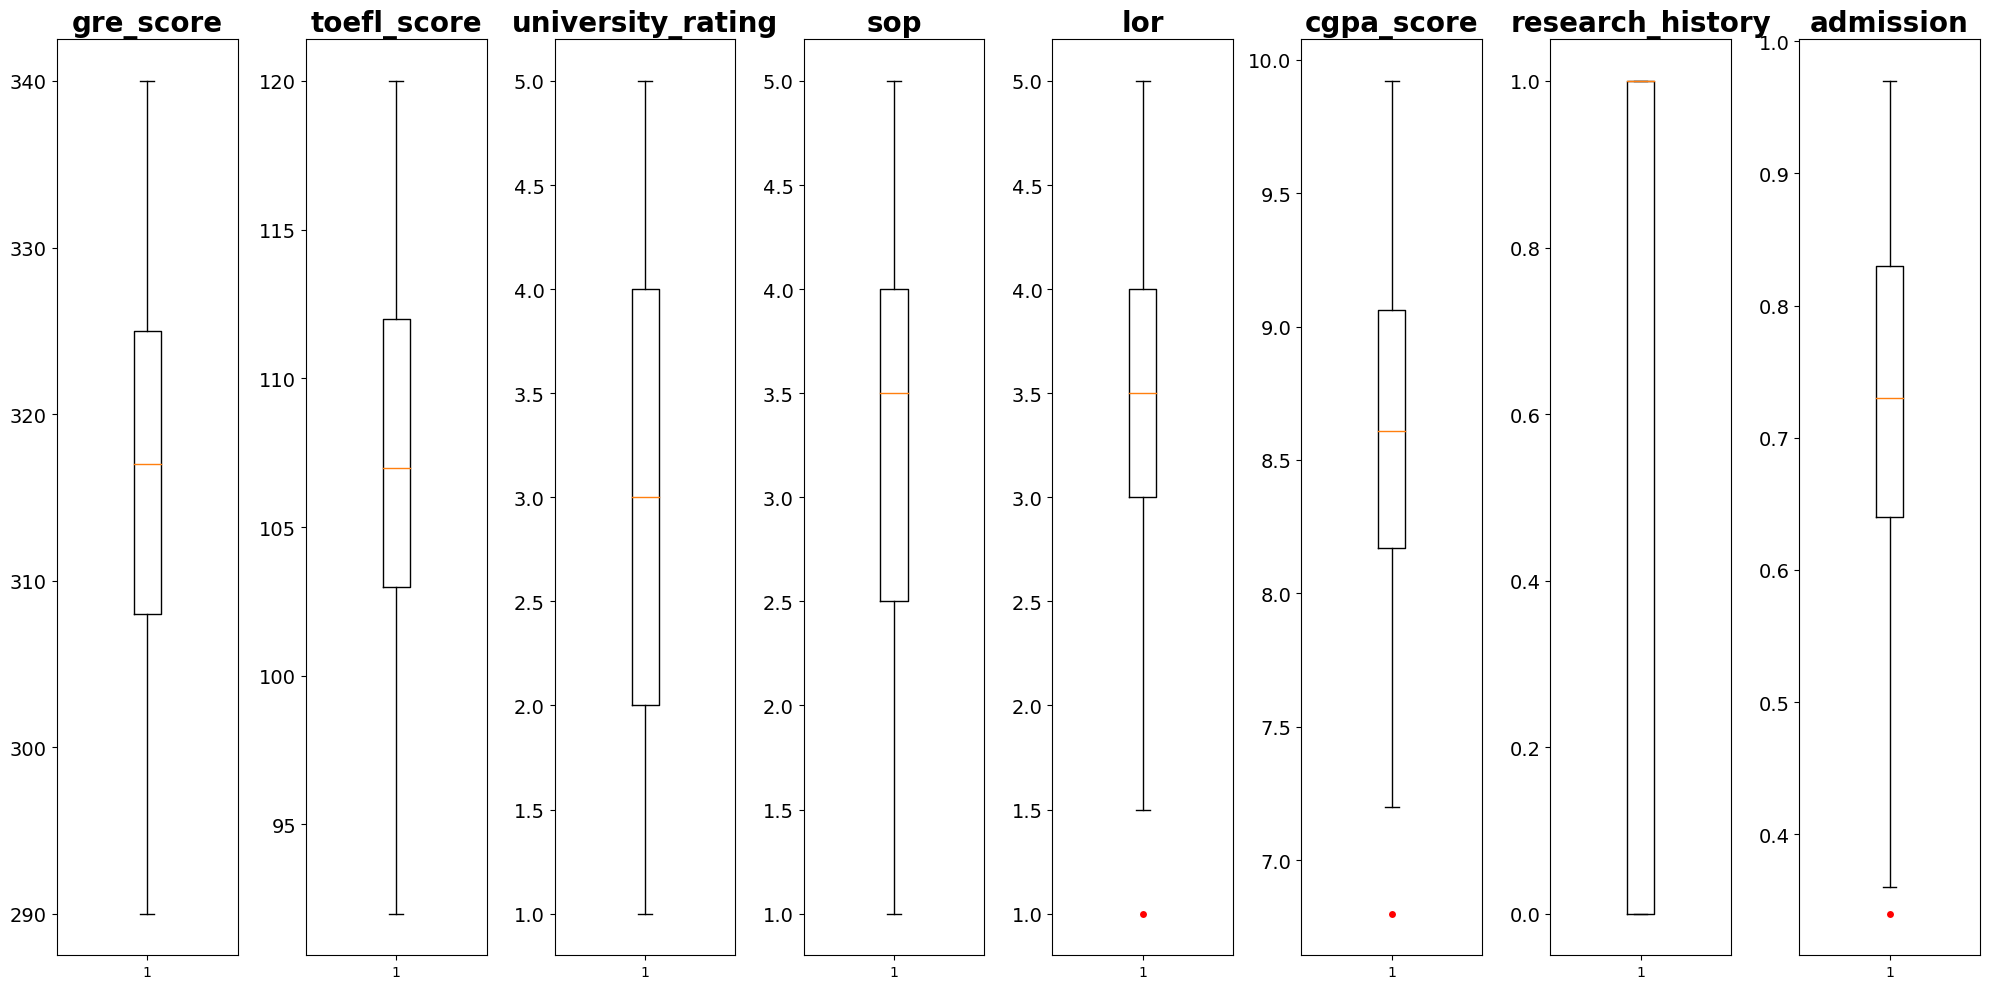

In [16]:
# box plot to check if data is skewed, understand the measure of spread and identify possible outliers

# create subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# make subplots
fig, axs = plt.subplots(1,len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i],
              flierprops=red_circle)
    df.iloc[:,i]
    
    ax.set_title(df.columns[i],
            fontsize=20,
            fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout();

In [17]:
# statistical summary of columns with outliers

df[['lor', 'cgpa_score','admission']].describe(include='all')

,lor,cgpa_score,admission
count,400.000000,400.000000,400.000000
mean,3.452500,8.598925,0.724350
std,0.898478,0.596317,0.142609
min,1.000000,6.800000,0.340000
25%,3.000000,8.170000,0.640000
50%,3.500000,8.610000,0.730000
75%,4.000000,9.062500,0.830000
max,5.000000,9.920000,0.970000


We seem to have outliers in the `lor` at 1.0, `cgpa_score` at 6.8 and `admission` at 0.34 in lower part of the graphs. Making the distribution slightly left skewed. These are not too extreme and can be expected because there are factors that could lead to them. 

### Building the Model

In [18]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history,admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.nunique()

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa_score           168
research_history       2
admission             60
dtype: int64

### Model Building

In [20]:
# Split data into 'X' and 'y'
X = df.drop('admission', axis=1)
y = df['admission']

In [21]:
# Look at feature matrix
X

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [22]:
# Look at the vector
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: admission, Length: 400, dtype: float64

### Data Preprocessing

Although all the features and the target are numerical,
however the numbers are of two types discrete and continuus and also the scale is not the same.
So we have to scandardize them, to have them on the same scale.

In [23]:
# Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler

In [24]:
# build the scaler model
scaler = StandardScaler()

In [25]:
# Fit using train set
scaler.fit(X);

In [26]:
# transform X 
X_scaled = scaler.transform(X)

In [27]:
# verify min values of all features
X_scaled.min(axis=0)

array([-2.33936728, -2.54209798, -1.82745726, -2.38661285, -2.73303589,
       -3.02050351, -1.09997489])

In [28]:
# verify max values of all features
X_scaled.max(axis=0)

array([2.02390285, 2.076899  , 1.67425725, 1.59107523, 1.724515  ,
       2.21816455, 0.90911166])

In [29]:
# split into train and test
from sklearn.model_selection import train_test_split

In [30]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                   y,
                                                   test_size=0.2, 
                                                   random_state=42)

### Choosing a Model

Three models we are going to try out:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor

In [31]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Put models in a dictionary
models = {'Linear Regression': LinearRegression(),
         'Tree': DecisionTreeRegressor(),
         'Random Forest': RandomForestRegressor(), 
         }

# Create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''    
    # make a dict to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Linear Regression': 0.821208259148699,
 'Tree': 0.6657580497308941,
 'Random Forest': 0.8080438362795314}

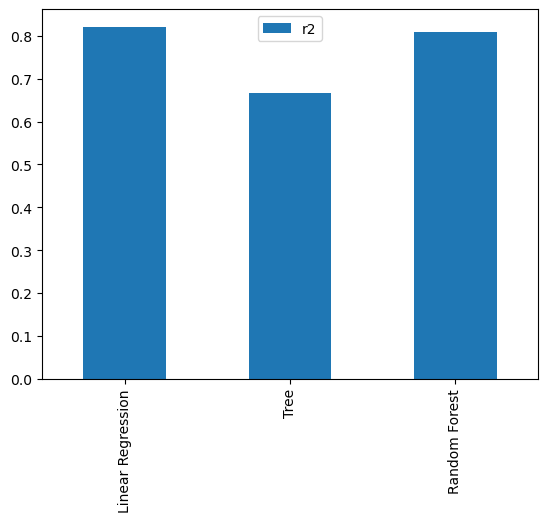

In [34]:
# visualizing the models performance
model_compare = pd.DataFrame(model_scores, index=['r2'])
model_compare.T.plot.bar();

   > Linear Regression model out performs the others, however the performance score is not good enough therefore the model needs to be tuned to increase performance.

In [35]:
# Base line model
lr = LinearRegression().fit(X_scaled, y)

In [36]:
# Base line predictions
y_preds = lr.predict(X_test)
y_preds

array([0.65247226, 0.72255056, 0.9352382 , 0.82006302, 0.57707255,
       0.92984084, 0.51199051, 0.53354   , 0.65493968, 0.83569313,
       0.71258632, 0.90662329, 0.54513739, 0.89467569, 0.69735613,
       0.68015917, 0.66595641, 0.46845492, 0.68103241, 0.98052451,
       0.57647288, 0.64133249, 0.70896484, 0.52637888, 0.95145856,
       0.81115494, 0.68966284, 0.55801648, 0.68784854, 0.80752472,
       0.80819792, 0.95234164, 0.64349049, 0.49421302, 0.66007027,
       0.66527375, 0.71226298, 0.63952038, 0.61056355, 0.87449262,
       0.74255796, 0.58738328, 0.7716647 , 0.96227964, 0.85148606,
       0.83486931, 0.94623461, 0.64339618, 0.92738243, 0.86423493,
       0.90279796, 0.72710335, 0.78589681, 0.95682275, 0.56500035,
       0.58154955, 0.68989286, 0.85302141, 0.60150182, 0.85120888,
       0.66208381, 0.64644485, 0.70086458, 0.49975379, 0.62521364,
       0.7144819 , 0.62189177, 0.8454789 , 0.8559911 , 0.7985727 ,
       0.71847784, 0.81142251, 0.86585369, 0.82951159, 0.51694

### Evaluating the Regression Model

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
r2_score(y_true=y_test, 
        y_pred=y_test)

1.0

If model perfectly predicted the test data, gets r2 score of 1.0

In [39]:
# R2 - how the model performs
r2_score(y_test, y_preds)

0.8325759069025183

In [40]:
# MAE - how far off the predictions are from the actual values
mean_absolute_error(y_test,y_preds)

0.04718247388276335

In [41]:
df1 = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': y_preds})
df1['differences'] = df1['predicted values'] - df1['actual values']
df1.head()

,actual values,predicted values,differences
209,0.68,0.652472,-0.027528
280,0.68,0.722551,0.042551
33,0.90,0.935238,0.035238
210,0.79,0.820063,0.030063
93,0.44,0.577073,0.137073


On average y_preds are +-0.0494 points off from the y test values

In [42]:
# MSE - 
mean_squared_error(y_test, y_preds)

0.0043234525240897275

In [43]:
# Squared differences
df1['squared differences'] = np.square(df1['differences'])
df1.head()

,actual values,predicted values,differences,squared differences
209,0.68,0.652472,-0.027528,0.000758
280,0.68,0.722551,0.042551,0.001811
33,0.90,0.935238,0.035238,0.001242
210,0.79,0.820063,0.030063,0.000904
93,0.44,0.577073,0.137073,0.018789


In [44]:
df1_large_error = df1.copy()
df1_large_error.iloc[0]['squared_differences'] = 16

In [45]:
df1_large_error.head()

,actual values,predicted values,differences,squared differences
209,0.68,0.652472,-0.027528,0.000758
280,0.68,0.722551,0.042551,0.001811
33,0.90,0.935238,0.035238,0.001242
210,0.79,0.820063,0.030063,0.000904
93,0.44,0.577073,0.137073,0.018789


In [46]:
# Calculate MSE with large error
df1_large_error['squared differences'].mean()

0.0043234525240897275

Since we dont have significant outliers in the differences, even if we introduce a large error value. The MSE is stil less than the MAE, and averages itself out to achieve the original MAE value.

#### Evaluation using `scoring` parameter

In [47]:
# import cross validation
from sklearn.model_selection import cross_val_score

In [48]:
# r2 
cv_r2 = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
cv_r2

array([0.66228895, 0.76112209, 0.78108683, 0.84044015, 0.81095904])

In [49]:
np.mean(cv_r2)

0.7711794121066353

r2 is 0.77 , it can be improved to go towards 1.0

In [50]:
print(f'The cross validated r2 score is: {np.mean(cv_r2)*100:.2f}%')

The cross validated r2 score is: 77.12%


In [51]:
# mae
cv_mae = cross_val_score(lr, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.04948667548545121

In [52]:
cv_mae

array([-0.06911   , -0.05699505, -0.04185826, -0.03202508, -0.04744499])

In [53]:
# mse
cv_mse = cross_val_score(lr, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.004753619007855828

In [54]:
cv_mse

array([-0.00913812, -0.00607795, -0.00267293, -0.00168872, -0.00419038])

For scoring of mse and mae , the scores are towards zero which is good.

### Improving the Model

####  Using Modified versions of Linear Regression 

In [54]:
# import Ridge and Lasso models
from sklearn.linear_model import Ridge, LassoCV

In [55]:
# Put models in a dictionary
models = {'Ridge' : Ridge(),
          'Lasso' : LassoCV() 
         }

# Create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''    
    # make a dict to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [56]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Ridge': 0.8209142150161788, 'Lasso': 0.8183094490374773}

Both Ridge and Lasso Regularization techniques are good to use since we have a small dataset. Ridge performs well even against the cross validated Lasso.
But Ridge will be more suitable because we only have 7 relevant predictors.
So we will tune it to improve it's predictive performance.

In [57]:
# Baseline Ridge Model
ridge = Ridge()

In [58]:
# ridge baseline hyperparameters
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

#### Tuning by hand


In [59]:
# make function to evaluate
def evaluate_preds(y_true, y_preds):
    """
    Function performs evaluation comparison on y_true labels vs y_preds,
    on our regression model
    """
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metric_dict = {'r2_score': r2,
                   'mean_absolute_error' : mean_absolute_error,
                   'mean_squared_error' : mean_squared_error
                  }
    print(f'r2 score: {r2:.2f}')
    print(f'mean absolute error: {mae:.3f}')    
    print(f'mean squared errror: {mse:.4f}')   
    
    return metric_dict

In [67]:
from sklearn.model_selection import GridSearchCV 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},
                     scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)


In [68]:
search.fit(X_scaled, y)
search.best_params_

{'alpha': 0.01}

In [69]:
abs(search.best_score_)

0.004516654310445059

In [78]:
ridge = Ridge(normalize=True, alpha=0.01)
ridge.fit(X,y)
model_2=(mean_squared_error(y_true=y, y_pred=ridge.predict(X)))
print(model_2)

0.0039884652412790185


In [79]:
coef_dict_baseline = {}
for coef, feat in zip(lr.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'gre_score': 0.019909511869133888,
 'toefl_score': 0.017698247338382336,
 'university_rating': 0.0065301247249974735,
 'sop': -0.0033237086242103725,
 'lor': 0.02005866259946116,
 'cgpa_score': 0.07083691711079945,
 'research_history': 0.012207092960926164}

In [80]:
coef_dict_ridge = {}
for coef, feat in zip(lr.coef_,df.columns):
    coef_dict_ridge[feat] = coef
coef_dict_ridge

{'gre_score': 0.019909511869133888,
 'toefl_score': 0.017698247338382336,
 'university_rating': 0.0065301247249974735,
 'sop': -0.0033237086242103725,
 'lor': 0.02005866259946116,
 'cgpa_score': 0.07083691711079945,
 'research_history': 0.012207092960926164}

The coefficient values are similiar, so the penalization did not make much of a difference.

  The baseline Ridge performance is better, with r2 at 0.90 and mae and mse of 0.03 and 0.002 respectively. These are good but we will adjust the hyperparameters and see if there is a difference.

Not much change if we adjust one hyperparameter

#### Tune using GridSearchCV

In [287]:
from sklearn.model_selection import GridSearchCV 

In [81]:
# create a grid of hyperparameters we want to adjust
grid = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
        'fit_intercept': [True,False],
        'random_state': [0, 1, 2, 18, 36, 42, 1234],
        'max_iter': [10000, 1000, 100],
        'normalize': [True, False],
        'solver':['auto', 'svd', 'cholesky', 'lsqr',
                 'sparse_cg', 'sag', 'saga']
        }

In [83]:
df_shuffled = df.copy()

In [87]:
# split into X and y
X = df_shuffled.drop('admission', axis=1)
y = df_shuffled['admission']

# split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Instance of Ridge
ridge = Ridge()

# setup GridSearchCV
gs_ridge = GridSearchCV(estimator=ridge,
                        param_grid=grid,
                        cv=5,
                        scoring='r2',
                        n_jobs=-1,
                        verbose=2)
# fit GridSearchCV version of Ridge
gs_ridge.fit(X_train, y_train);

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits


In [88]:
gs_ridge.best_params_

{'alpha': 0.01,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': True,
 'random_state': 0,
 'solver': 'saga'}

In [91]:
gs_ridge.best_score_

0.7984841293850378

In [89]:
# make predictions
gs_y_preds = gs_ridge.predict(X_test)
# evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

r2 score: 0.78
mean absolute error: 0.046
mean squared errror: 0.0043


In [92]:
model=Ridge(alpha=0.01,
            fit_intercept=True,
            max_iter=10000,
            normalize=True,
            random_state=0,
            solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test,u y_pred))

0.7815767461127778


In [95]:
# visualize to compare model metrics
compare_metrics = pd.DataFrame({#'baseline': baseline_metrics,
                               #'ridge': ridge_metrics,
                               'grid search': gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

TypeError: no numeric data to plot

## Summary 

When utilizing continuous regression, performance is assessed by minimizing error, with zero being the model's optimal performance. The ideal skill is zero, whereas excellent performance is tiny negative values near to zero and huge positive mistakes become large negative errors. When analyzing findings, the negative sign in the MAE is disregarded.
The Ridge model performs well.

By collecting more data, we could maybe improve the model's efficiency even further.